We import *const* to have a listing of the possible actions

In [1]:
import const

## Environment

We import and instantiate a mock SQL server

In [2]:
import mockSQLenv

env = mockSQLenv.mockSQLenv(verbose=True)

Game setup with a random query


For debugging, you can check the correct escape-probing actions and the correct SQL injection using the *reveal_solution()* method.

In [3]:
env.reveal_solution()

Correct escapes are: 
 [17]: ' and '1'='1 
 [18]: ' and '1'='2
Correct SQL injection is: 
 [33]: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#


The mock server accepts actions through the *step()* method. By default it takes the integer of the action you want to perform (from *const.actions*); you can also pass the actual string using the parameter *action_string*. 

In [4]:
env.step(2)

I received action 2: " union select 1#
Query is syntactically wrong. I return -1


(-1, -1, False, 'Server response is -1')

In [5]:
env.step(action_number=2)

I received action 2: " union select 1#
Query is syntactically wrong. I return -1


(-1, -1, False, 'Server response is -1')

In [6]:
env.step(action_string='" union select 1#')

action_number) None
I received action 2: " union select 1#
Query is syntactically wrong. I return -1


(-1, -1, False, 'Server response is -1')

**Beware**: There is no check in place for the inputs! O_O

The output of step is always *state*, *reward*, *termination state* and *auxiliary/debug messages*.
The state variable return the actual output:
- 1: first correct escape character probing
- 2: second correct escape character probing
- 3: flag!
- 0: correct use of escape characters, but no useful result
- -1: wrong use of escape characters, syntax error 

In [7]:
env.step(12)

I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1


(-1, -1, False, 'Server response is -1')

After getting the flag you can restart the server using *reset()*. This does **NOT** instantiate a new random SQL query, but it uses the same one. To have a new query instantiate a new environment.

In [8]:
###########################################################3333
##############################################################################################


In [9]:
import agent as agn
import numpy as np
agt = agn.Agent(const.actions)
agt.set_learning_options(exploration=0.2, 
                         learningrate=0.1, 
                         discount=0.9)
print(agt.Q.shape)

In [16]:
nepisodes = 50
for _ in range(nepisodes):
    env = mockSQLenv.mockSQLenv(verbose=True)
    agt.reset(env)
    
    agt.run_episode()
    print(agt.Q.shape)

Game setup with a random query
Game reset (but not reinitialized with a new random query!)
Game reset
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 34:  and 1=1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union 

I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 24: ' union select 1,2,3 limit 1 offset 2#
Query

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I rece

I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,fl

I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 36:  union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 1: " and "1"="2
C

I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 21: ' union select 1,2#
Query with correct number of rows
Server response is 4
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 35:  and 1=2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 7: " union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 16: " union select flag,flag,

I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 47:  union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 

Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Flag captured. I return 3
Server response is 3
(64, 51)
Game setup with a random query
Game reset (but not reinitialized with a new random query!)
Game reset
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I

I received action 7: " union select 1,2,3 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 35:  and 1=2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 6: " union select 1,2,3#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of 

Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct es

Server response is -1
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Flag captured. I return 3
Server response is 3
(64, 51)
Game setup with a random query
Game reset (but not reinitialized with a new random query!)
Game reset
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 15: " union sele

Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is 

Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response 

I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 44:  union select 1,2,3,4,5#
Query is syntactically wrong. I return -1
Server response is -1
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 17: ' and '1'='1
Query is syntactically wrong. I return -1
Server response is -1
I received action 38:  union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 23: ' union select 1,2,3#
Query is syntactically wrong. I return -1
Server response is -1
I received action 44:  union select 1,2,3,4,5#
Query is s

I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0

Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 

I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 3: " union select 1 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct explorat

Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31:

I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server resp

Server response is -1
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 7: " union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 50:  union select flag,flag,flag,flag,flag from Flagtabl

I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 28: ' union select 1,2,3,4,5 limit 1 offset 2#
Query with correct number of rows
Server response is 4
I received action 7: " union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 6: " union select 1,2,3#
Query is syntactically wrong. I return -1
Server response is -1
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 25: ' union select 1,2,3,4#
Query has the correct escape,

I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 39:  union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 17: ' and '1'='1
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received act

Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 46:  union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 39:  union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 4: " union select 1,2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 21: ' union select 1,2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 42:  union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action

I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 11: " union select 1,2,3,4,5 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 20: ' union select 1 limit 1 offset 2#
Query with correct number of rows
Server response is 4
I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 2: " union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 49:  union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 20: ' union select 1 limit

I received action 20: ' union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 48:  union select flag,flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 36:  union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 42:  union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 15: " union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 16: " union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 49:  

I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 19: ' union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " a

Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 20: ' union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 12: " union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 11: " union select 1,2,3,4,5 limit 1 offset 2#
Query wit

Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 22: ' union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " and "1"="1
Corre

I received action 44:  union select 1,2,3,4,5#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 21: ' union select 1,2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 28: ' union select 1,2,3,4,5 limit 1 offset 2#
Query with correct number of rows
Server response is 4
I received action 5: " union select 1,2 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 11: " union select 1,2,3,4,5 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 12: " union select flag from Flagtable limit 1 o

I received action 18: ' and '1'='2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 2: " union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I received action 33: ' union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 42:  union select 1,2,3,4#
Query is syntactically wrong. I return -1
Server response is -1
I received action 32: ' union select flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 35:  and 1=2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 2

I received action 20: ' union select 1 limit 1 offset 2#
Query with correct number of rows
Server response is 4
I received action 7: " union select 1,2,3 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 37:  union select 1 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 17: ' and '1'='1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 4: " 

Correct exploratory action for the escape. I return 1
Server response is 1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 31: ' union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 26: ' union select 1,2,3,4 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 17: ' and '1'='1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 45:  union select 1,2,3,4,5 limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 30: ' union select flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I retur

Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 5: " union select 1,2 limit 1 offset 2#
Query with correct number of rows
Server response is 4
I received action 14: " union select flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 44:  union select 1,2,3,4,5#
Query is syntactically wrong. I return -1
Server response is -1
I received action 0: " and "1"="1
Correct exploratory action for the escape. I 

Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 18: ' and '1'='2
Query is syntactically wrong. I return -1
Server response is -1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I received action 0: " and "1"="1
Correct exploratory action for the escape. I return 1
Server response is 1
I received action 1: " and "1"="2
Correct exploratory action for the escape. I return 2
Server response is 2
I receiv

Server response is 0
I received action 6: " union select 1,2,3#
Query is syntactically wrong. I return -1
Server response is -1
I received action 44:  union select 1,2,3,4,5#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 10: " union select 1,2,3,4,5#
Query is syntactically wrong. I return -1
Server response is -1
I received action 50:  union select flag,flag,flag,flag,flag from Flagtable limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 41:  union select 1,2,3 limit 1 offset 2#
Query has the correct escape, but contains the wrong number of rows. I return 0
Server response is 0
I received action 13: " union select flag,flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
Server response is -1
I received action 2: " union select 1#
Query is syntactically wrong. I return -1
Server response is -1
I receive

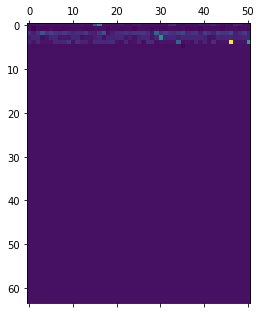

In [17]:
import matplotlib.pyplot as plt
plt.matshow(agt.Q)